In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

grandparent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

csv_file_path = os.path.join(grandparent_dir, 'crop_recommendation.csv')

In [11]:
# Load the data
data = pd.read_csv(csv_file_path)

In [12]:
# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [16]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [17]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [18]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9864
Precision: 0.9855
Recall: 0.9873
F1-Score: 0.9861


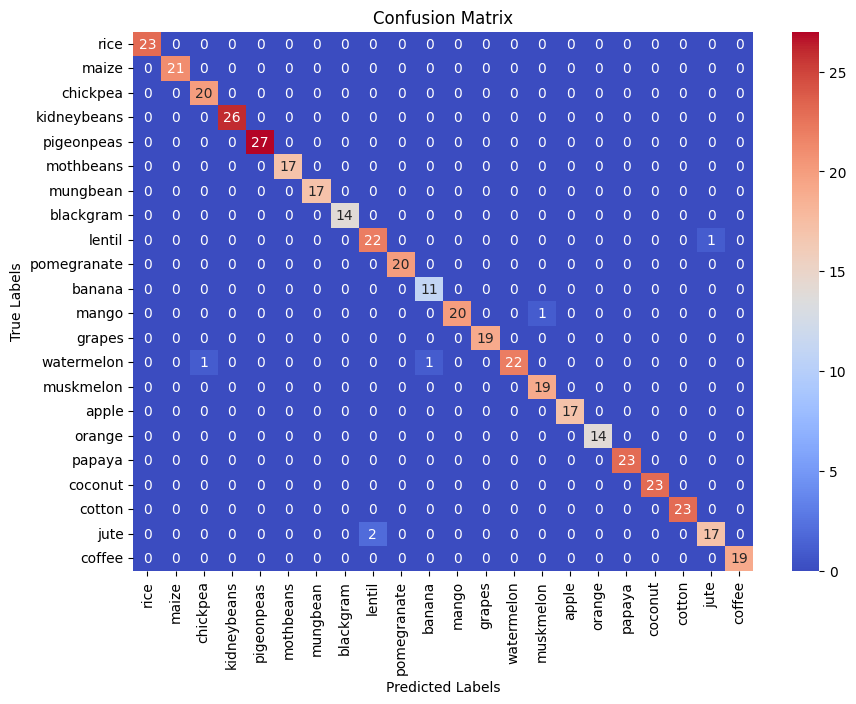

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=data['label'].unique(), columns=data['label'].unique())

print("Best Hyper-parameters:", best_params)
print("Test Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()